# Gradient boosting

Le Gradient Boosting appartient aussi à la famille des méthodes de boosting. Il adopte une approche séquentielle dans laquelle chaque modèle est construit en corrigeant les erreurs du modèle précédent. Au contraire d'Adaboost, il utilise des arbres de décision un peu plus complexes que de simples souches. Cependant, il met des restrictions sur la taille de l'arbre.

Pour illustrer le fonctionnement du Gradient Boosting, considérons de nouveau l'échantillon de données. 

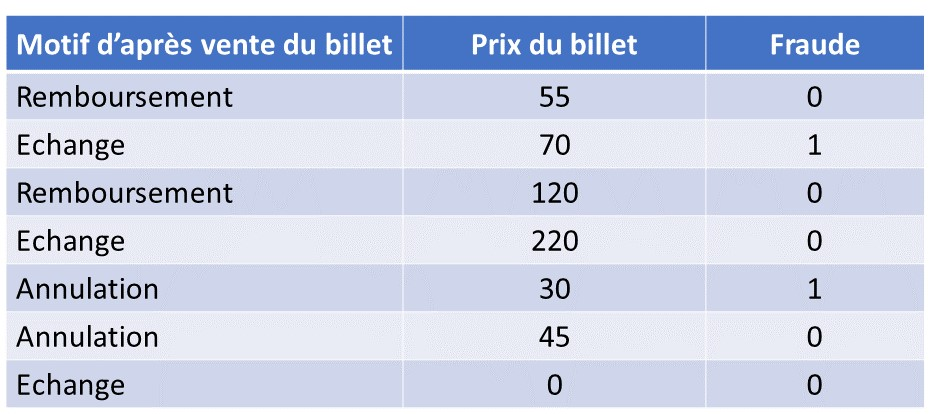

In [2]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/table.jpg"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

L'objectif principal du Gradient Boosting est d'optimiser une fonction de coût, qui, pour notre cas de classification binaire, est la perte d'entropie croisée, définie comme suit pour N observations  :

\begin{equation}
L(y, \hat{y}) = -\frac{1}{N}\sum_{i=1}^{N}\left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right)
\end{equation}

Avec y étant la valeur observée et $\hat{y}$ représentant la probabilité prédite.\\

La première étape de l'algorithme consiste à initialiser le premier prédicteur par la valeur qui minimise cette fonction coût. 

La fonction de perte L(y, $\hat{y}$) peut être simplifiée en utilisant la transformation log(odds) initiée par $\log\left(\frac{p}{1 - p}\right)$, où 
p représente la probabilité que l'observation appartienne à la classe positive. La simplification se résume à :
\begin{align*}
    L(y, \hat{y}) %&= -\frac{1}{N}\sum_{i=1}^{N}\left(y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right) \\
    &= -(y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})) \\
    &= -y\log(\hat{y}) - \log(1 - \hat{y}) + y\log(1 - \hat{y}) \\
    &= -y[\log(\hat{y}) - \log(1 - \hat{y})]  - \log(1 - \hat{y}) \\
    &= -y \left(\frac{\log(\hat{y})}{\log(1 - \hat{y})}\right)  - \log(1 - \hat{y}) \\
    &= -y \log\left(\frac{\hat{y}}{1 - \hat{y}}\right)  - \log(1 - \hat{y}) \\
    &= -y\log(\text{odds}) - \log\left(1 - \frac{\exp(\log(\text{odds}))}{1+\exp(\log(\text{odds}))}\right) \\
    &= -y\log(\text{odds}) + \log(1) - \log\left(1+\exp(\log(\text{odds}))\right) \\
    &= -y\log(\text{odds}) - \log\left(1+\exp(\log(\text{odds}))\right)
\end{align*}

Ensuite, nous prenons la dérivée de la fonction de coût par rapport à log(odds) et on la met à zéro:
\begin{align*}
\frac{\partial L }{\partial \log(odds)} = 0 \iff -y +\frac{\exp(\log(\text{odds}))}{1+\exp(\log(\text{odds}))} = 0 \iff
 -y + \frac{odds}{1+odds}= 0 \iff  -y + \hat{y}  = 0 \iff y = \hat{y}\\
\end{align*}

Cela nous donne le premier prédicteur F0:
\begin{equation}
    \hat{y} = \frac{\exp(\log(\text{odds}))}{1+\exp(\log(\text{odds}))}.
\end{equation}


avec le log(odds) initialisé par $\log\left(\frac{p}{1 - p}\right)$
où \(p\) est la probabilité que l'observation appartienne à la classe positive, et elle est définie comme suit :

\begin{equation}
p = \frac{\text{Nombre d'observations positives}}{\text{Nombre total d'observations}}.
\end{equation}

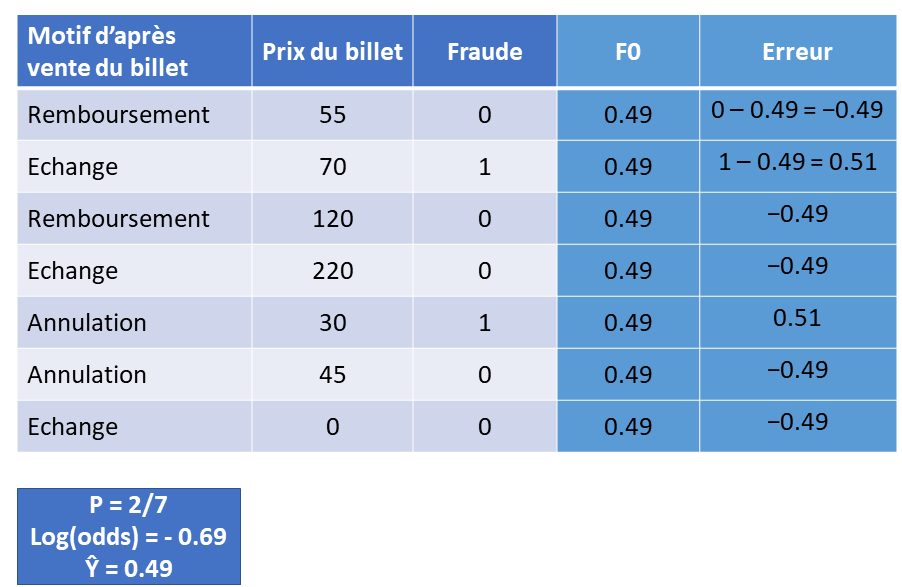

In [3]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/corr.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

La deuxième étape consiste à calculer les erreurs des prédictions faites par le prédicteur initial. Ces erreurs indiquent à quel point les prédictions initiales étaient incorrectes pour chaque observation. Elles sont calculées comme suit :

                                             Erreur = Valeur observée - Valeur prédite 

Ensuite, un arbre est construit pour prédire ces erreurs au lieu de la variable cible "Fraude", améliorant ainsi la précision du modèle.
%La prochaine étape consiste à construire un arbre qui prédit les erreurs et non plus la variable cible "Fraude". La principale raison pour laquelle Gradient Boosting adopte cette approche est d'améliorer la précision du modèle.% En minimisant les erreurs, le modèle peut capturer des relations complexes entre les variables expliquatives la variable cible, ce qui se traduira par des prédictions plus fiables.\\

Le prédicteur peut avoir des noeuds terminaux qui contiennent plusieurs résultats correspondant à plusieurs observations. Contrairement à la forêt aléatoire et à l'arbre de décision, le résultat final dans le noeud terminal n'est pas déterminé par un vote majoritaire, mais par la formule suivante, qui s'applique à notre cas de classification \cite{GB} :

\begin{equation*}
\text{valeur_nœud_terminal} = \frac{\sum_{i=1}^{n}\text{erreurs}}{\sum_{i=1}^{n}(\text{probabilité prédite précédemment})(1 - \text{probabilité prédite précédemment})}
\end{equation*}
Pour l'instant, les probabilités précédentes sont les mêmes pour toutes les résidus, mais cela changera lorsque nous construirons le prochain arbre.

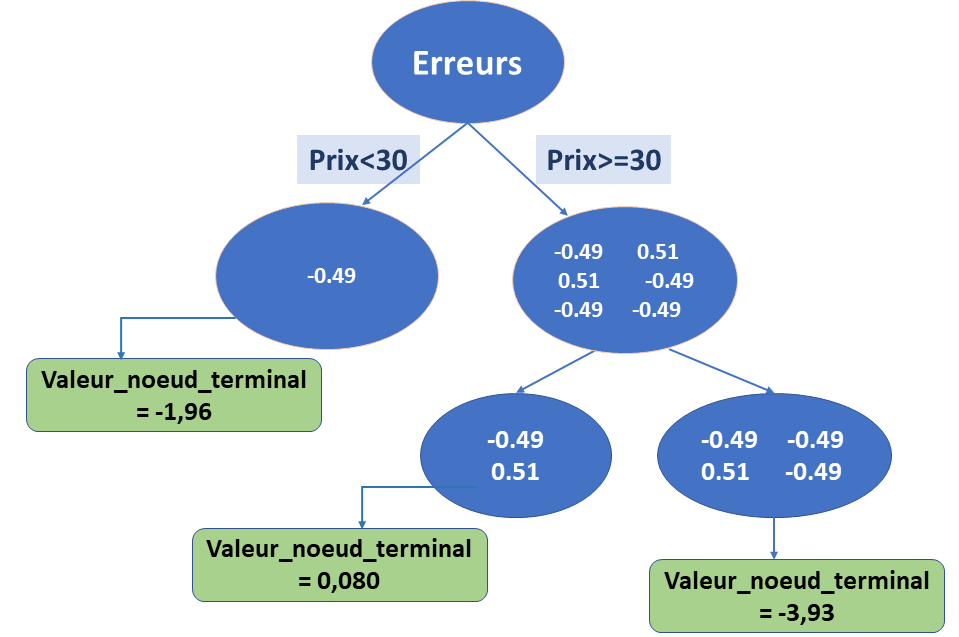

In [5]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/noeud terminal final.png"
width = 500
height = 500
Image(filename=image_path, width=width, height=height)

Contrairement aux arbres de décision, l'algorithme utilise l'erreur quadratique moyenne (EQM) ou "friedman\_mse" au lieu de Gini et l'entropie pour mesurer la qualité d'une division. Par défaut, c'est "friedman\_mse".% Ce critère porte le nom de Jerome Friedman, qui a introduit le gradient boosting. Ce critère est utilisé pour déterminer dans quelle mesure une division des données améliorera la qualité globale de l'arbre de décision. Explorons comment la "friedman\_mse" est calculée et ce qu'elle représente :

On rappel la formule de l'erreur quadratique moyenne pour un ensemble de données de taille $N$:
\begin{equation}
EQM = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
\end{equation}
où : $y_i$ représente la valeur cible réelle pour le $i$-ème point de données, et $\hat{y}_i$ représente la valeur prédite correspondante.

Le critère "friedman\_mse" s'appuie sur l'EQM. Il mesure la réduction du l'EQM résultant de la division des données. Cette réduction est appelée "score d'amélioration" donné par:

\begin{equation}
Score d'amélioration =\frac{n_{\text{gauche}} \cdot n_{\text{droite}} \cdot \text{(EQM_gauche - EQM_droite)}^2}{n_{\text{gauche}} + n_{\text{droite}}}  
\end{equation}

$n_{\text{gauche}}$ représente le nombre de données dans le nœud enfant gauche après la division et $n_{\text{droite}}$ représente celui dans le noeud enfant droit. La variable qui entraîne le plus grand score d'amélioration est sélectionnée pour diviser les données.

Lors de l'examen de plusieurs divisions potentielles lors de la construction d'un arbre de décision, l'algorithme calcule le score d'amélioration pour chaque division potentielle. La division qui entraîne le plus grand score d'amélioration est sélectionnée comme la meilleure division.


Ensuite, pour mettre à jour la probabilité prédite, on ajuste le $\log(odds)$ selon la formule suivante :

$\log(odds)\_nouveau$ = $\log(odds)$ de la prédiction précédente + Learning rate $\times$ valeur du noeud terminal fournie par l'arbre.

Et ainsi on met à jour la probabilité prédite pour le prédicteur suivant la formule donnée par l'équation (5) ci-dessus. Et les étapes du calcul de l'erreur ainsi que la construction de l'arbre pour les prédire se répètent jusqu'à ce que les erreurs ne diminuent plus ou atteindre un critère d'arrêt.

Enfin, pour prédire un nouvel exemple, l'algorithme parcourt tous les arbres, met à jour les log(odds), et la dernière probabilité prédite est comparée à un seuil qui est par défaut de 50\%. %Si $\hat{y}$ > 50%, l'algorithme prédit la classe 1 ; sinon, il prédit la classe 0. 
Ainsi, similairement à AdaBoost, le Gradient Boosting attribue un score à chaque arbre, mais contrairement à AdaBoost, il assigne le même score à tous les arbres, déterminé par le learning\_rate.

# Hyperparamètres de Gradient Boosting

| Hyperparamètre                         | Description                                              |
|---------------------------------------|----------------------------------------------------------|
| `n_estimators`                         | Le nombre d'estimateurs (arbres) dans l'ensemble.        |
| `learning_rate`                        | Taux d'apprentissage (taux auquel les erreurs sont corrigées). |
| `max_depth`                            | La profondeur maximale des arbres de décision.           |
| `min_samples_split`                   | Le nombre minimum d'échantillons requis pour diviser un nœud. |
| `min_samples_leaf`                    | Le nombre minimum d'échantillons requis dans une feuille. |
| `subsample`                            | La fraction d'échantillons à utiliser pour l'apprentissage de chaque arbre. |
| `max_features`                         | Le nombre de fonctionnalités à considérer pour chaque division. |
| `max_leaf_nodes`                       | Le nombre maximum de feuilles dans chaque arbre.         |
| `min_impurity_decrease`                | Seuil pour l'arrêt anticipé des arbres basé sur l'impureté. |
| `min_impurity_split`                   | Seuil d'impureté pour diviser un nœud.                    |
| `criterion`                            | La fonction de mesure de qualité de la division ('friedman_mse' ou 'mse'). |